
# **Column Descriptions:**
1.  id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on 7.admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/ML Problems/Heart Disease Prediction/heart_disease_data.csv")

In [9]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **EDA**

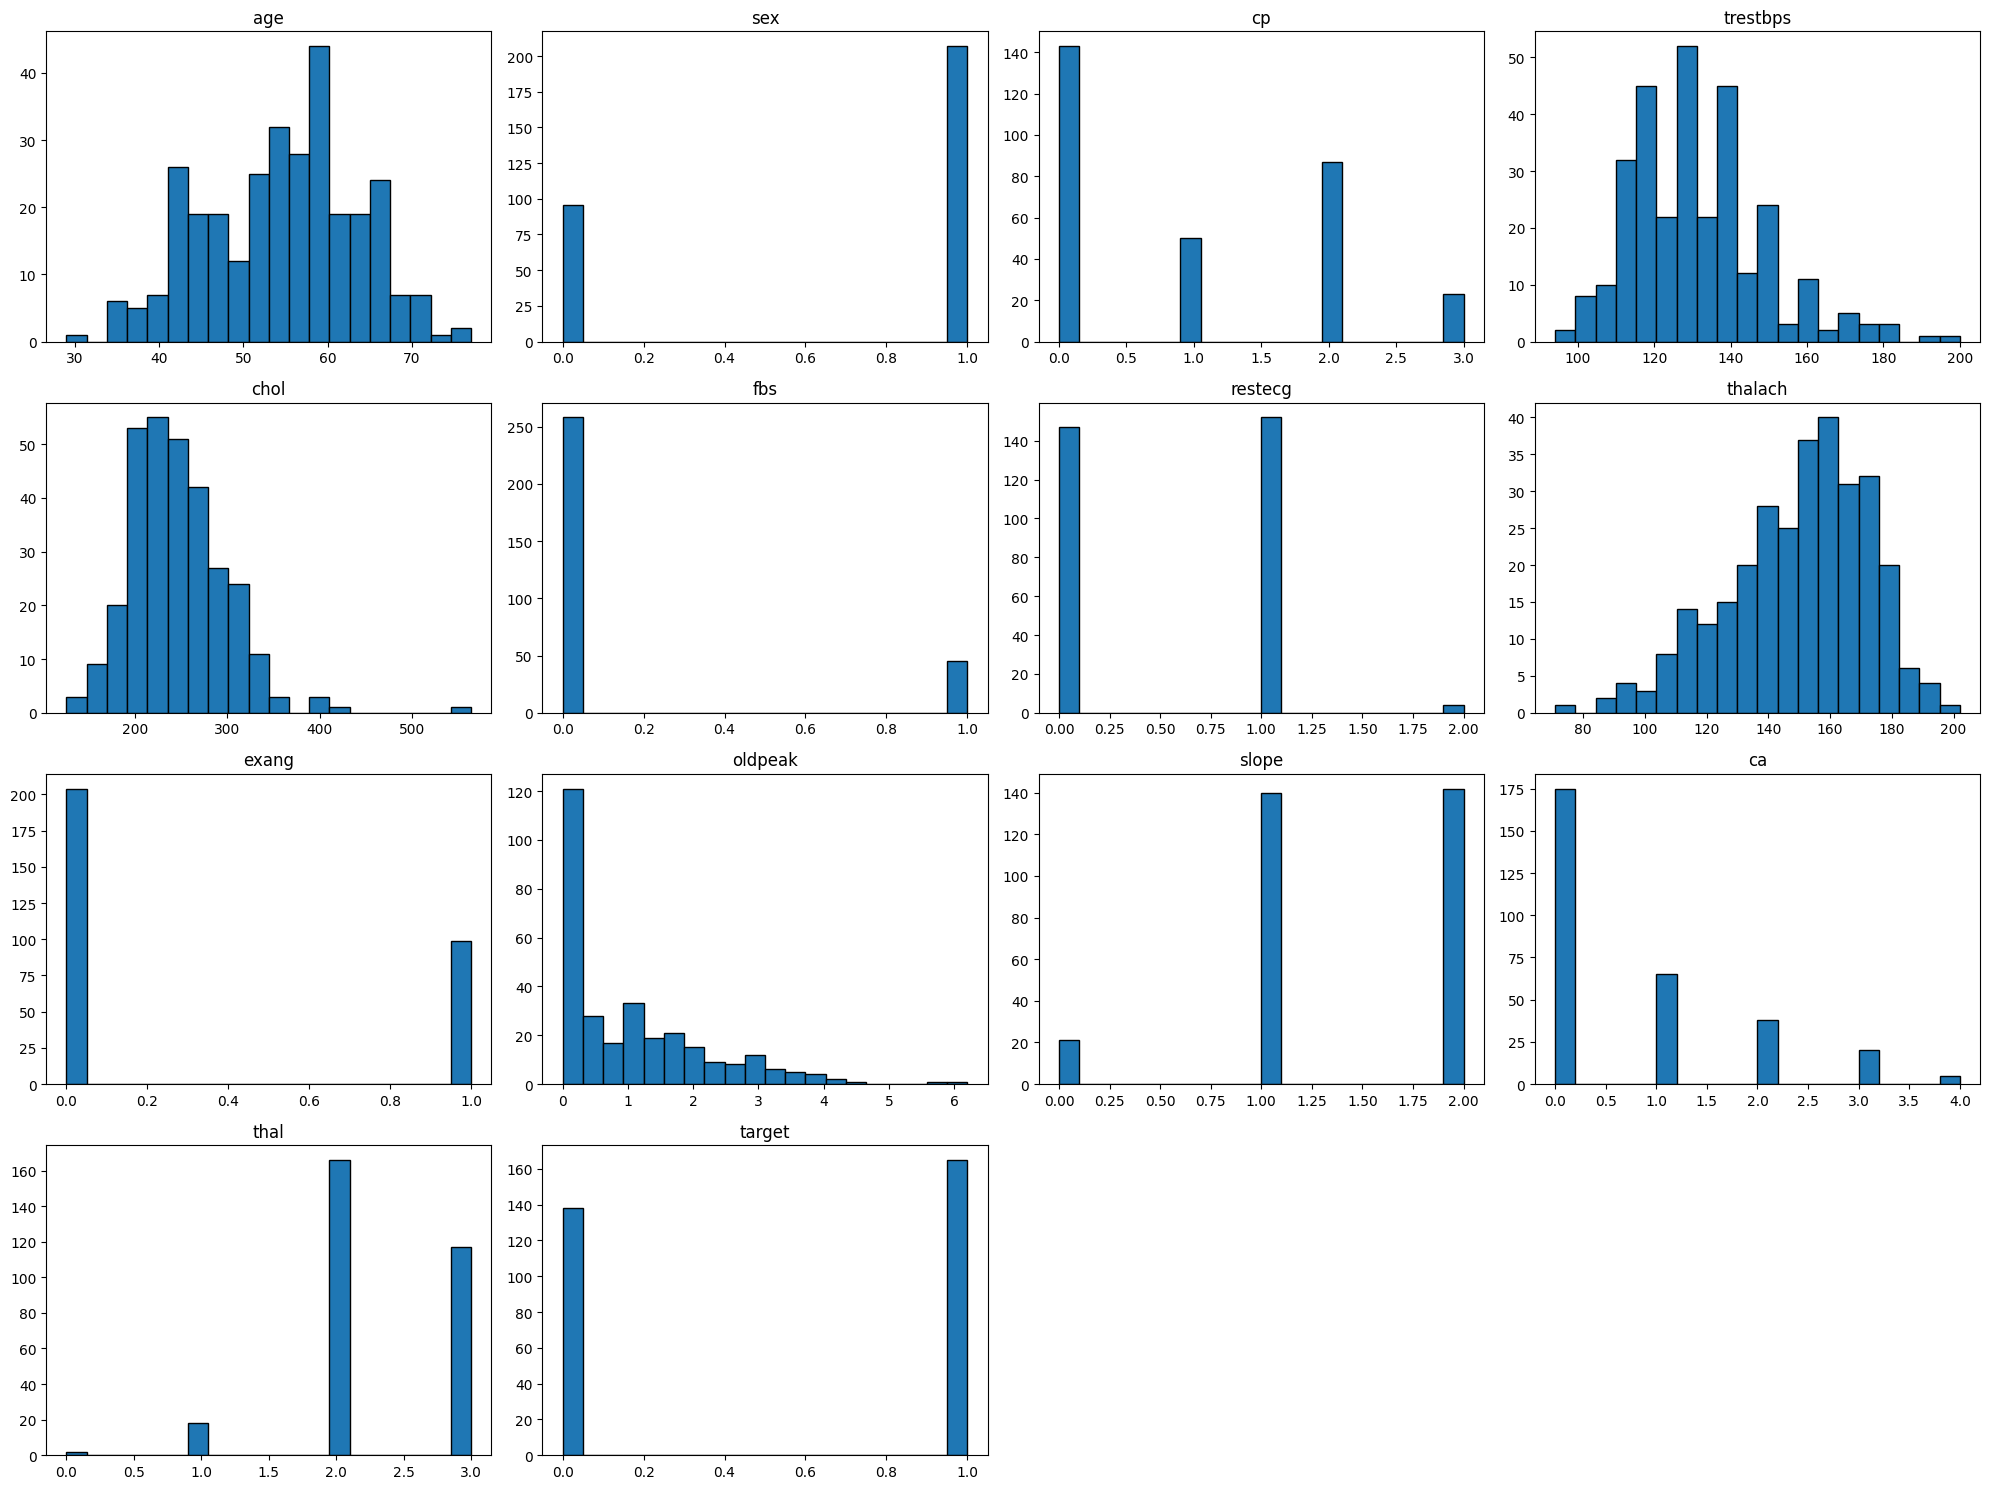

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms for each feature
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    plt.hist(data[column], bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()


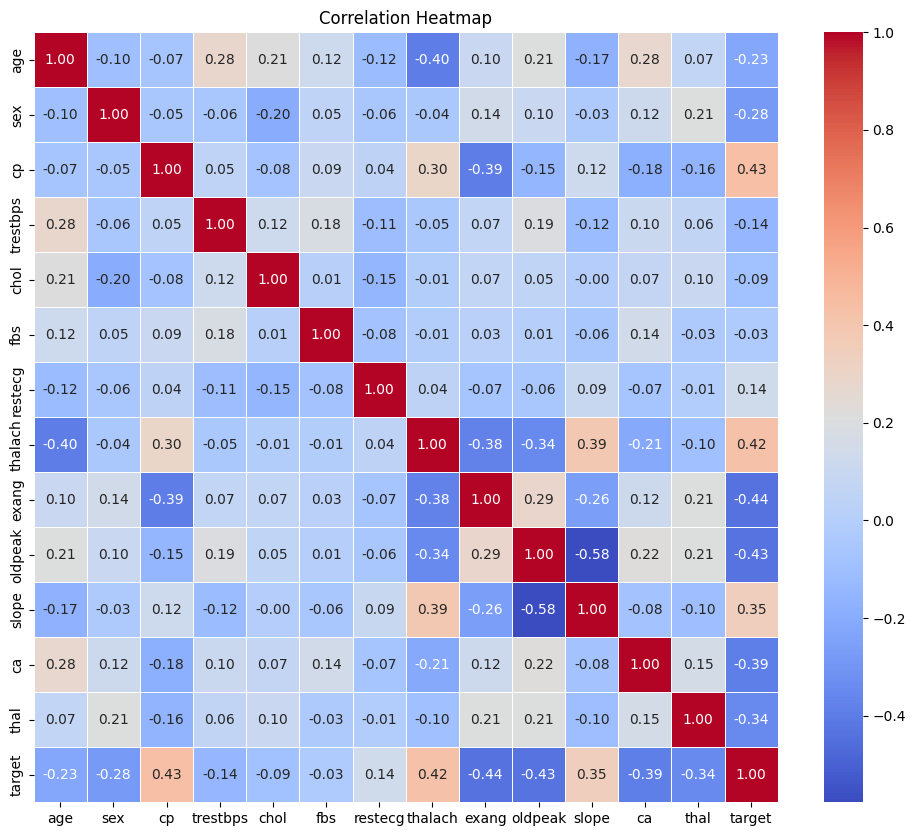

In [12]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **PCA & SCALING**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Show the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.21254053, 0.11820708])

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Show the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


Explained variance ratio: [0.21254053 0.11820708]


# **MODEL SELECTION**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate the models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

print("Random Forest Classifier - Accuracy:", accuracy_rf, "Precision:", precision_rf)
print("Logistic Regression - Accuracy:", accuracy_lr, "Precision:", precision_lr)


Random Forest Classifier - Accuracy: 0.819672131147541 Precision: 0.8181818181818182
Logistic Regression - Accuracy: 0.8360655737704918 Precision: 0.84375
